In [1]:
import xlrd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from datetime import date
from datetime import datetime

In [2]:
file = r'G:/Мой диск/03 Development Cometee/Обратная франшиза/Модели обратной франшизы 2020-06-28.xlsx'
sheets = ['Профсоюзная','Щука','Планерная']
xlrd_book = xlrd.open_workbook(file, on_demand=True)
data = {}
with pd.ExcelFile(xlrd_book) as xls:
    counter = 0
    for sheet in sheets:
        sheet_data = pd.read_excel(xls, sheet)
        store = sheet_data.iloc[0][1]
        sheet_data = sheet_data.iloc[:,1:].dropna(how='all', subset=['Unnamed: 1', 'Unnamed: 25'])
        sheet_data = sheet_data.dropna(subset=['Unnamed: 25'])
        sheet_data.iloc[0,0] = 'Month'
#        sheet_data.columns = sheet_data.iloc[2]
        sheet_data = sheet_data.T.reset_index()
        sheet_data.columns = sheet_data.iloc[0]
        sheet_data = sheet_data.dropna(subset=['Month'])
        sheet_data = sheet_data.drop(['Unnamed: 1'], axis=1)
        sheet_data = sheet_data.drop([0])
        data[store] = sheet_data
data[list(data.keys())[0]].head(2)

,Month,Сезонность,Тренд,Заказы,Средний чек,Sell Out incl VAT,Sell Out net of VAT,COGS,%,iGM,...,Reverse fr. - Partner,Diff,"100% ""white"" salary",the same termas like in agency,As Is - UCR,FR - UCR OPBT,FR - Partner's Net Income,Taxes As Is,Taxes FR - UCR,Taxes FR - Partner
1,2020-01-31 00:00:00,0.789578,NaN,8464,142.911,1209.6,1008,-362.303,0.359428,-80.64,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-02-29 00:00:00,0.910085,NaN,9465,141.293,1337.34,1114.45,-362.303,0.325096,-89.156,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


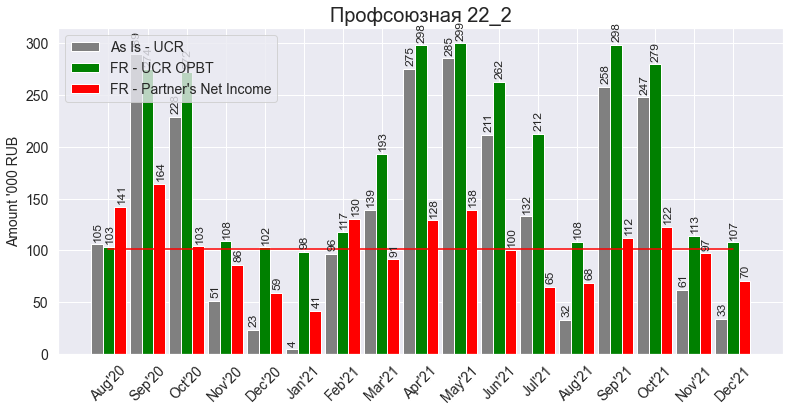

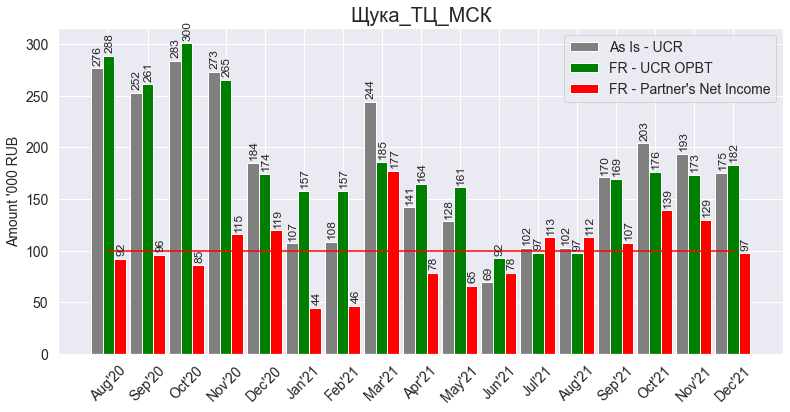

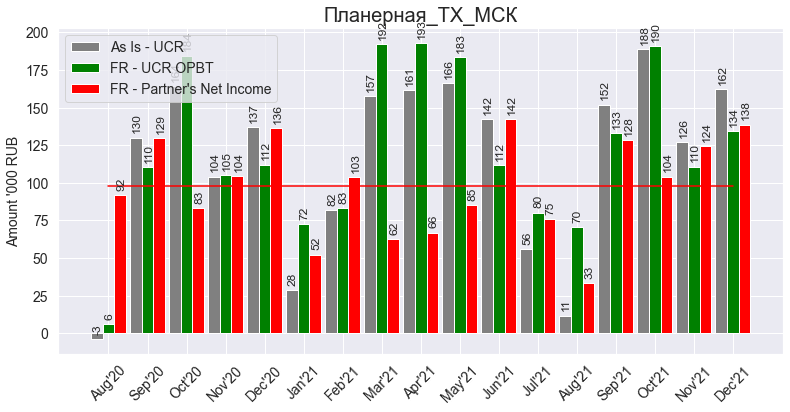

In [11]:
for store in range(3):
    df = data[list(data.keys())[store]].iloc[-17:]
    sns.set()
    width = 0.3
    labels = df['Month'].apply(lambda x: x.strftime('%b\'%y'))
    x = np.arange(len(df['Month']))
    fig, ax = plt.subplots(figsize=(13,6))
    bars = ['As Is - UCR', 'FR - UCR OPBT', 'FR - Partner\'s Net Income'] 
    ax.bar(x - width, df[bars[0]], width, label=bars[0], color='gray')
    ax.bar(x, df[bars[1]], width, label=bars[1], color='green')
    ax.bar(x + width, df[bars[2]], width, label=bars[2], color='red')
    ax.plot(range(0,17), df[bars[2]].apply(lambda x: df[bars[2]].mean()),  color='red')
    ax.set_title(list(data.keys())[store], fontsize=20)
    ax.set_xticks(x)
    ax.set_ylabel('Amount \'000 RUB', fontsize=14)
    ax.set_xticklabels(labels, fontsize=14, rotation=45)
#    ax.set_yticklabels(fontsize=14)
    for label in ax.get_yticklabels():
        label.set_fontsize(14)
    for n in range(3):
        for i, val in enumerate(df[bars[n]].values):
            plt.text(i+(n-0.90)*width, val+3, int(val), rotation='vertical',
                     horizontalalignment='center', verticalalignment='bottom', fontsize=12)
    ax.legend(fontsize=14)
    plt.savefig('G:/Мой диск/03 Development Cometee/Обратная франшиза/Pictures/{}-{}-{} {}'.format(datetime.now().year, datetime.now().month,
                                         datetime.now().day, list(data.keys())[store]))